In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from controllers.data import Data
from controllers.utils import load
import matplotlib.ticker as mtick

In [2]:
def backtest(asset: str): 
    tuner = load(f"/home/williamharris/Dev/CQF_final_project/models_predict_1hr/Autoencoder_{asset}/hyper_tuner.pickle")
    trend_model = tuner.get_best_model()
    encoder_model = load(f"/home/williamharris/Dev/CQF_final_project/models_predict_1hr/{asset}_autoencoder_model/{asset}_autoencoder_model/model.pickle")
    data = Data(
                lookback=10,
                train_size=0.6,
                validation_size=0.2,
                test_size=0.2,
                scaler=MinMaxScaler(),
                feature_set=f"{asset}_Data",
                time_to_predict=1,
                features=None,
            )

    encoded_test = encoder_model.model.get_layer('encoder').predict(data.dataset.X_test)
    predictions = trend_model.predict(encoded_test)
    df = data.test_df.assign(predictions=predictions).set_index(0)
    prices = pd.read_csv(f'/home/williamharris/Dev/CQF_final_project/data/{asset}_Data.csv').set_index('Unnamed: 0')
    prices['Returns'] = prices.close.pct_change().shift(-1)
    strategies = pd.merge(prices, df, left_index=True, right_index=True)[['Returns', 'predictions']]
    strategies['Buy and Hold'] = ((1+strategies.Returns).cumprod() - 1)*100
    strategies['Strategy'] = np.where(strategies['predictions'] > 0.5, strategies['Returns'], -strategies['Returns'])
    strategies['Strategy'] = ((1+strategies['Strategy']).cumprod() - 1)*100
    strategies.index = pd.to_datetime(strategies.index)
    strategies.dropna(inplace=True)
    return strategies

INFO:tensorflow:Reloading Oracle from existing project models_predict_1hr/Autoencoder_BTC/oracle.json


2022-08-22 18:26:52.847871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 18:26:52.854958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 18:26:52.855544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 18:26:52.856921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 18:26:52.857413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

INFO:tensorflow:Reloading Tuner from models_predict_1hr/Autoencoder_BTC/tuner0.json


/home/williamharris/anaconda3/envs/tf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--------------------- X_train ---------------------
Features: ['ATR_3', 'ATR_7', 'ATR_14', 'ATR_32', 'BB_UPPER_5', 'BB_LOWER_5', 'BB_MIDDLE_5', 'BB_UPPER_10', 'BB_LOWER_10', 'BB_MIDDLE_10', 'BB_UPPER_20', 'BB_LOWER_20', 'BB_MIDDLE_20', 'BLOCK_SIZE', 'HASH_RATE', 'DIFFICULTY', 'TRANSACTION_RATE', 'ACTIVE_ADDRESSES', 'NEW_ADDRESSES', 'ROC_3', 'ROC_6', 'ROC_12', 'ROC_24', 'RSI_3', 'RSI_7', 'RSI_14', 'RSI_32', 'WILLIAMS_3', 'WILLIAMS_7', 'WILLIAMS_14', 'WILLIAMS_32', 'MI_3', 'MI_9', 'MI_18', 'CCI_5', 'CCI_10', 'CCI_20', 'BASP_BUY_10', 'BASP_SELL_10', 'BASP_BUY_20', 'BASP_SELL_20', 'BASP_BUY_40', 'BASP_SELL_40', 'ER_5', 'ER_10', 'ER_15', 'ER_20', 'MACD_LOW', 'MACD_SIGNAL_LOW', 'MACD_MID', 'MACD_SIGNAL_MID', 'MACD_HIGH', 'MACD_SIGNAL_HIGH', 'ADX_3', 'ADX_7', 'ADX_14', 'ADX_21', 'STOCH_3', 'STOCH_7', 'STOCH_14', 'STOCH_21', 'STOCHRSI_3', 'STOCHRSI_7', 'STOCHRSI_14', 'STOCHRSI_21', 'BBWIDTH_5', 'BBWIDTH_10', 'BBWIDTH_20', 'PERCENT_B_5', 'PERCENT_B_10', 'PERCENT_B_20', 'TARGET']
start date: 201

2022-08-22 18:27:30.155187: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


509/509 [==============================] - 4s 5ms/step


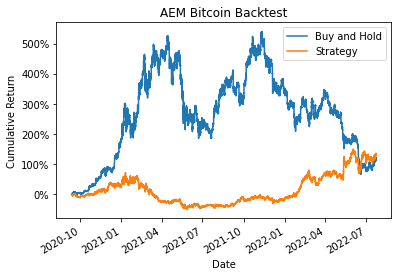

In [3]:
backtest_btc_df = backtest('BTC')
ax = backtest_btc_df[['Buy and Hold', 'Strategy']].plot(title='AEM Bitcoin Backtest')
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

INFO:tensorflow:Reloading Oracle from existing project models_predict_1hr/Autoencoder_ETH/oracle.json
INFO:tensorflow:Reloading Tuner from models_predict_1hr/Autoencoder_ETH/tuner0.json
--------------------- X_train ---------------------
Features: ['ATR_3', 'ATR_7', 'ATR_14', 'ATR_32', 'BB_UPPER_5', 'BB_LOWER_5', 'BB_MIDDLE_5', 'BB_UPPER_10', 'BB_LOWER_10', 'BB_MIDDLE_10', 'BB_UPPER_20', 'BB_LOWER_20', 'BB_MIDDLE_20', 'BLOCK_SIZE', 'HASH_RATE', 'DIFFICULTY', 'TRANSACTION_RATE', 'ACTIVE_ADDRESSES', 'NEW_ADDRESSES', 'ROC_3', 'ROC_6', 'ROC_12', 'ROC_24', 'RSI_3', 'RSI_7', 'RSI_14', 'RSI_32', 'WILLIAMS_3', 'WILLIAMS_7', 'WILLIAMS_14', 'WILLIAMS_32', 'MI_3', 'MI_9', 'MI_18', 'CCI_5', 'CCI_10', 'CCI_20', 'BASP_BUY_10', 'BASP_SELL_10', 'BASP_BUY_20', 'BASP_SELL_20', 'BASP_BUY_40', 'BASP_SELL_40', 'ER_5', 'ER_10', 'ER_15', 'ER_20', 'MACD_LOW', 'MACD_SIGNAL_LOW', 'MACD_MID', 'MACD_SIGNAL_MID', 'MACD_HIGH', 'MACD_SIGNAL_HIGH', 'ADX_3', 'ADX_7', 'ADX_14', 'ADX_21', 'STOCH_3', 'STOCH_7', 'STOCH_14

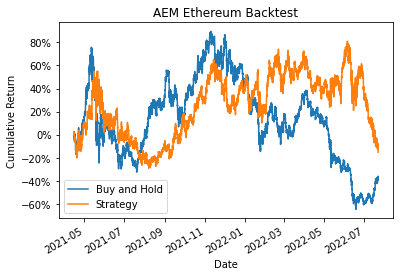

In [4]:
backtest_eth_df = backtest('ETH')
ax = backtest_eth_df[['Buy and Hold', 'Strategy']].plot(title='AEM Ethereum Backtest')
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())